In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
## load data
train = pd.read_csv('products_transactional.csv')

C:\Anaconda3\envs\aind-dog-copy\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## fill missing values
#products['customerID'].fillna('BBID_0000', inplace=True)
train['promotion_description'].fillna('no_promo', inplace=True)
train['Gender'].fillna('no_gender', inplace=True)
train['State'].fillna('no_state', inplace=True)
train['PinCode'].fillna(-1, inplace=True)
train['DOB'].fillna("1", inplace=True)

In [4]:
#handling missing data for product_code
train = train[np.isfinite(train['product_code'])]

In [5]:
#Correcting bad states
state_dict = {'MADHY PRADESH':'MADHYA PRADESH', 'TAMILNADU':'TAMIL NADU', 'MADHYA  PRADESH':'MADHYA PRADESH', 'HARAYANA':'HARYANA',
             'Jharkhand':'JHARKHAND','Tamilnadu':'TAMIL NADU','Tamil Nadu':'TAMIL NADU','Madhya Pradesh':'MADHYA PRADESH',
             'REST OF WEST BENGAL':'WEST BENGAL', 'west bengal':'WEST BENGAL','Uttar Pradesh':'UTTAR PRADESH', 'Delhi':'DELHI',
             'Bhopal':'BHOPAL','CHHATISGARH':'CHHATTISGARH','CHATTISGARH':'CHHATTISGARH', 'jharkhand':'JHARKHAND','Chandigarh':'CHANDIGARH',
             'UTTAR PRADESH WEST': 'UTTAR PRADESH','ODISHA':'ORISSA','MAHARASTRA':'MAHARASHTRA','madhya pradesh':'MADHYA PRADESH',
             'KARNATAK':'KARNATAKA','JAMMU and KASHMIR':'JAMMU AND KASHMIR','JAMMU KASHMIR':'JAMMU AND KASHMIR','Rajasthan':'RAJASTHAN',
             'east singhbhum':'JHARKHAND', 'ORRISA':'ORISSA','Andhra Pradesh':'ANDHRA PRADESH', 'UTTARANCHAL':'UTTARAKHAND',
             'Uttar pradesh':'UTTAR PRADESH','Maharashtra':'MAHARASHTRA','MP':'MADHYA PRADESH', 'UTTAR PRADESH EAST':'UTTAR PRADESH',
             'Punjab':'PUNJAB','maharashtra':'MAHARASHTRA','Karnataka':'KARNATAKA','M.P.':'MADHYA PRADESH','DAMAN':'DAMAN AND DIU',
             'HUBLI':'KARNATAKA','Tamil nadu':'TAMIL NADU','GUJRAT':'GUJARAT', 'Mp':'MADHYA PRADESH','Madhya pradesh':'MADHYA PRADESH',
             'West Bengal':'WEST BENGAL','Gujarat':'GUJARAT','UP':'UTTAR PRADESH','Chennai':'CHENNAI', 'm.p.':'MADHYA PRADESH',
             'kerala':'KERALA'}

train.replace({"State": state_dict}, inplace=True)

In [6]:
train["transactionDate"] = pd.to_datetime(train["transactionDate"],format="%Y-%m-%d")

In [7]:
train["month"] = pd.DatetimeIndex(train["transactionDate"]).month
train["day"] = pd.DatetimeIndex(train["transactionDate"]).day
train["dayofweek"] = pd.DatetimeIndex(train["transactionDate"]).dayofweek
train["year"] = pd.DatetimeIndex(train["transactionDate"]).year

In [8]:
train.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,month,day,dayofweek,year
0,BBID_2041,1981-10-18,male,no_state,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,no_promo,3.007851e+08,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback,1,19,1,2016
1,BBID_2041,1981-10-18,male,no_state,452001,2016-06-21,2655,BB-INDORE-MALHAR MEGA MALL,21,57836,NONPROMO,no_promo,1.000316e+09,SOO FRESH ROLL PIZZA 1PLT,40.0,Payback,6,21,1,2016
2,BBID_2041,1981-10-18,male,no_state,452001,2016-04-07,2655,BB-INDORE-MALHAR MEGA MALL,21,43394,NONPROMO,no_promo,1.000315e+09,SOO FRESH PUFF PEAS & POTATO 1PLT,35.0,Payback,4,7,3,2016
3,BBID_2041,1981-10-18,male,no_state,452001,2016-03-19,2655,BB-INDORE-MALHAR MEGA MALL,21,39335,NONPROMO,no_promo,3.009301e+08,SOFRSH VD EGGS REGULAR 6P,72.0,Payback,3,19,5,2016
4,BBID_2041,1981-10-18,male,no_state,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,no_promo,1.000010e+09,SOO FRESH BREAD BROWN 400g,15.0,Payback,1,19,1,2016


# Frequency of order by week day

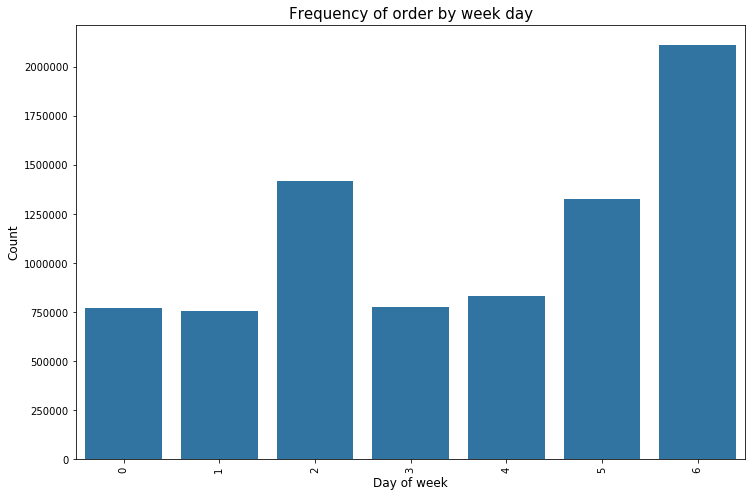

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="dayofweek", data=train, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

So we see that the transactions are highest on Sunday, Wednesday and Saturday

# Frequency of order by day in a month

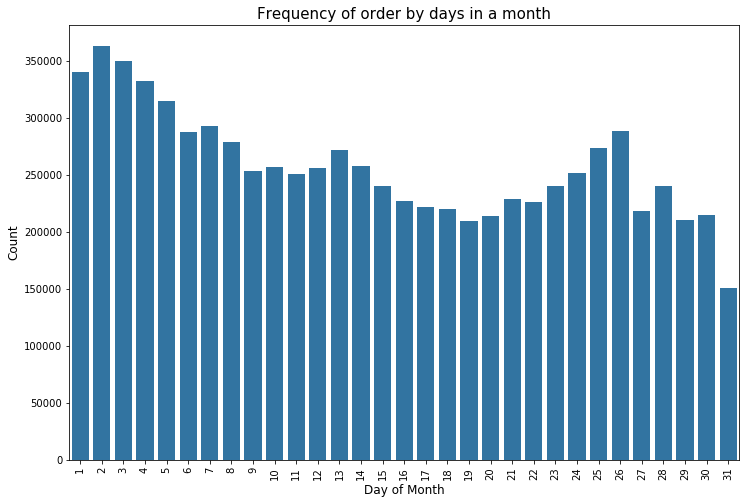

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="day", data=train, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by days in a month", fontsize=15)
plt.show()

# Frequency of order by month

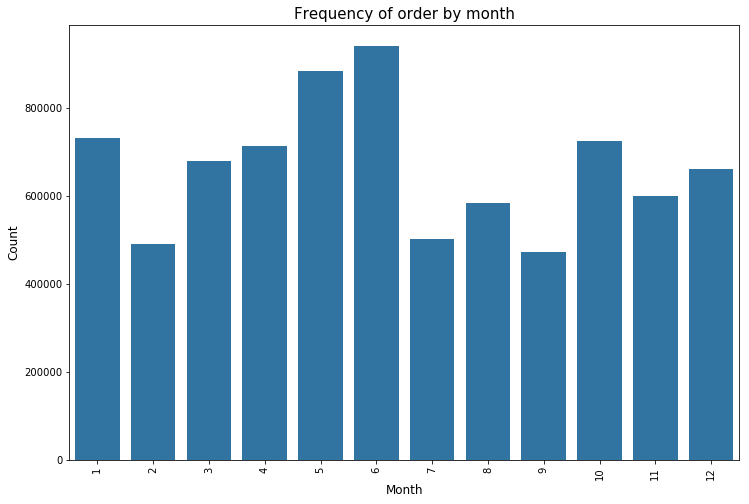

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="month", data=train, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by month", fontsize=15)
plt.show()

So we see the sales are highest around May-June

# Frequency of Orde by year

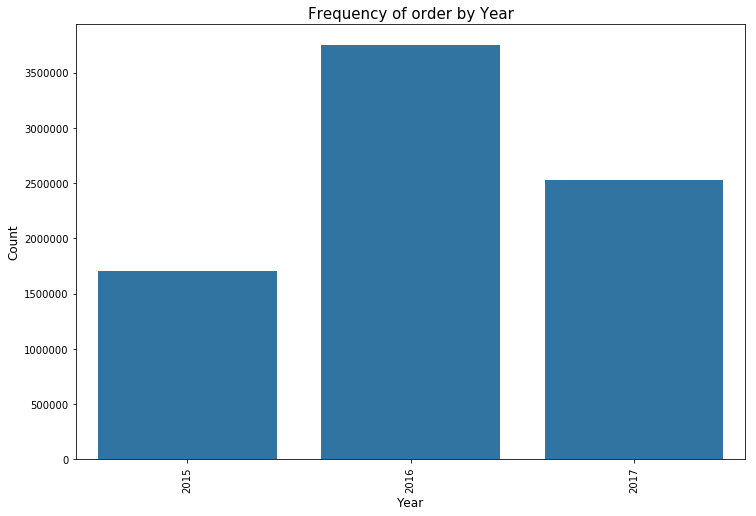

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="year", data=train, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by Year", fontsize=15)
plt.show()

2016 had the highest sales although for 2017, we only have data till July.

# Heatmap of Month Vs Day

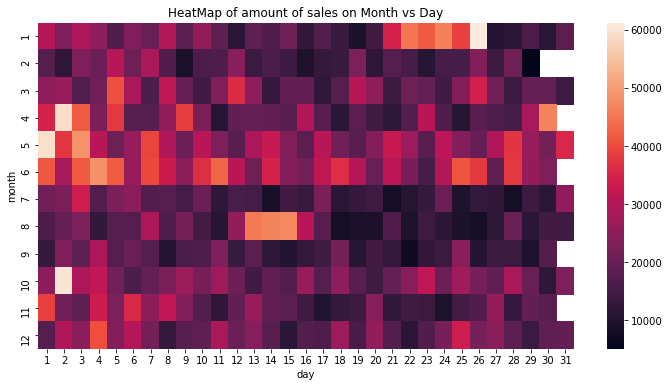

In [13]:
grouped_df = train.groupby(["month", "day"])["product_code"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('month', 'day', 'product_code')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("HeatMap of amount of sales on Month vs Day")
plt.show()

# Top 20 most popular products

In [14]:
cnt_srs = train['product_description'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,BB-CB-27X30X208SWG NEW,60994
1,BB-CB-20X25X208SWG NEW,58437
2,SUGAR MEDIUM LOOSE,51338
3,BB-CB-20X25X168SWG-Suitable for ROI New,41500
4,TOMATO LOOSE,35307
5,BB-CB-27X30X168SWG-Suitable for ROI New,34794
6,Fiber bag 45 GSM 20x25,31149
7,ONION LOOSE,27963
8,TATA SALT PP 1Kg,27727
9,POTATO LOOSE,25360


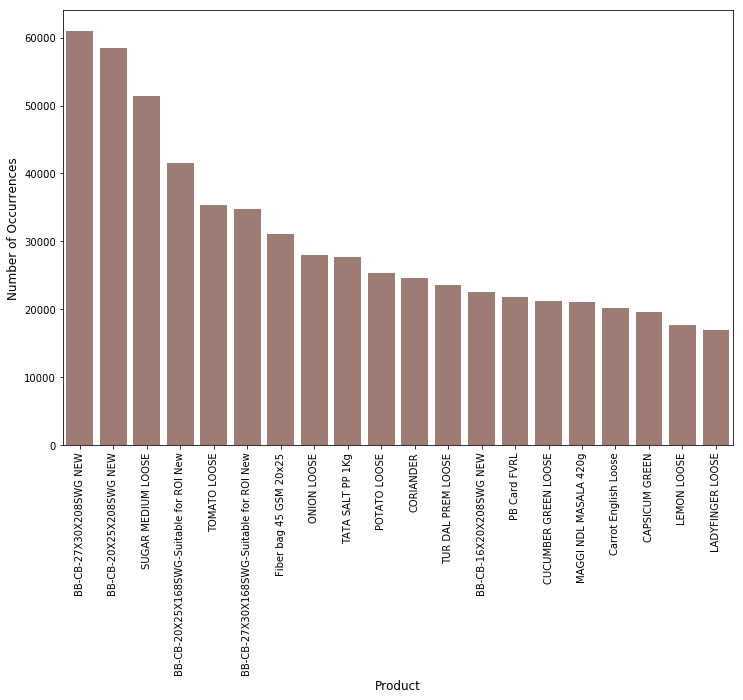

In [15]:
cnt_srs = train['product_description'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# Transactions by State(Top 10)

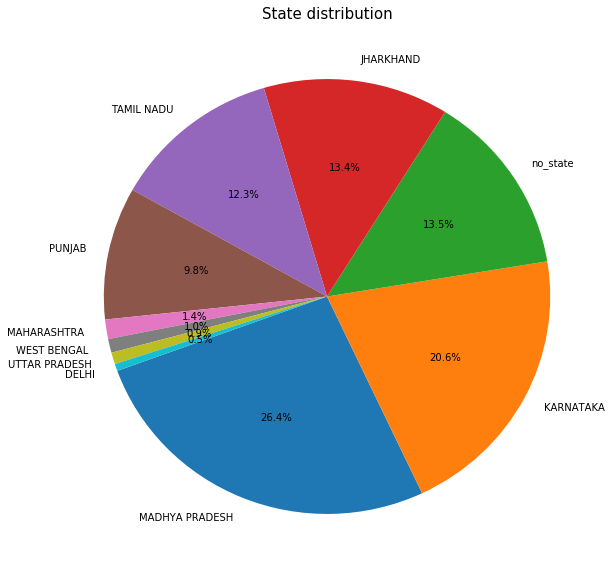

In [16]:
plt.figure(figsize=(10,10))
temp_series = train['State'].value_counts().head(10)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("State distribution", fontsize=15)
plt.show()

# Product analysis by TFIDF

Now we will see if the model will learn any useful information about the products from the order history of all users, maybe in the future this can be used as input to a classifier that recommends products.

In [17]:
train["product_description"] = train["product_description"].astype(str)
train_tfidf = train.groupby("customerID").apply(lambda order: order['product_description'].tolist())
train_tfidf = train_tfidf.reset_index()
train_tfidf.columns = ['customerID','product_set']
train_tfidf.product_set = train_tfidf.product_set.astype(str)
train_tfidf.head()

,customerID,product_set
0,BBID_2041,"['BB-CB-16X20X168SWG-Suitable for ROI New', 'S..."
1,BBID_20410,"['FB VG CHILLI RED MIRCHI', 'FB VG CHILLI RED ..."
2,BBID_204100,"['Safari Vertigo Purple, 65 cm', 'SOFRSH TRF B..."
3,BBID_2041000,"['FB EX PARSLEY CURLY', 'DRUMSTICK LEAVES', 'S..."
4,BBID_20410000,"['D-PHILIPS HP 8695 MUTI STYING KIT', 'LOREAL ..."


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, max_features=1000
                        , strip_accents='unicode',lowercase =True,
analyzer='word', token_pattern=r'\w+', use_idf=True, 
smooth_idf=True, sublinear_tf=True, stop_words = 'english')
tfidf.fit(train_tfidf['product_set'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w+', tokenizer=None, use_idf=True,
        vocabulary=None)

In [20]:
from sklearn.decomposition import TruncatedSVD
text = tfidf.transform(train_tfidf['product_set'])
svd = TruncatedSVD(n_components=2)
text = svd.fit_transform(text)
text = pd.DataFrame(text)
text.columns = ['pf_0','pf_1']
text['customerID'] = train_tfidf.customerID
text.head()

,pf_0,pf_1,customerID
0,0.234144,0.005581,BBID_2041
1,0.269041,-0.102702,BBID_20410
2,0.243243,0.145926,BBID_204100
3,0.226683,0.060414,BBID_2041000
4,0.069611,0.018663,BBID_20410000


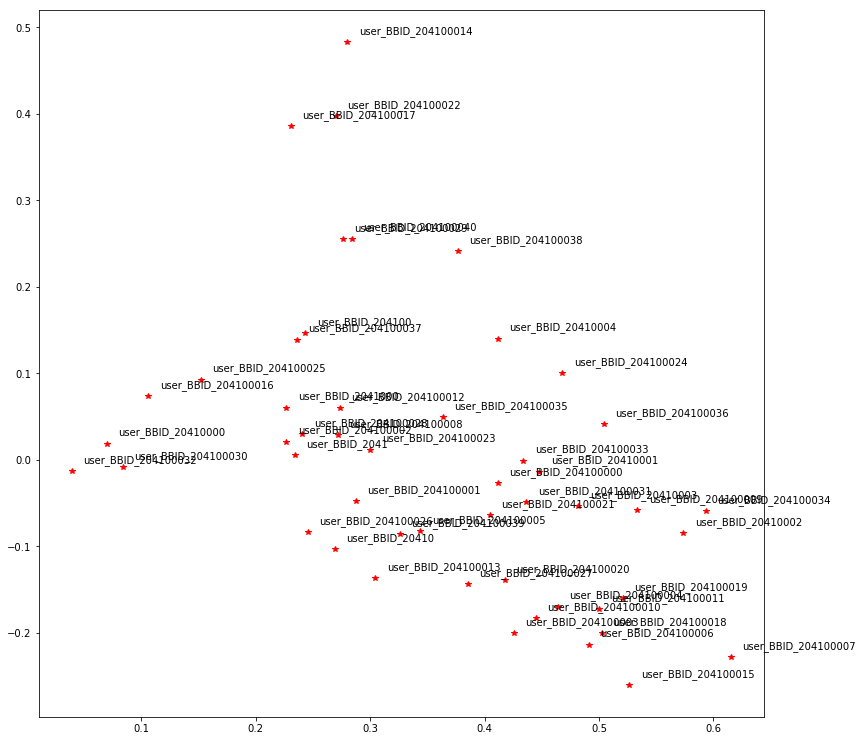

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
plt.plot(text['pf_0'].head(50),text['pf_1'].head(50),'r*',label=text['customerID'].head(50))
for row in text.head(50).itertuples():
    plt.annotate('user_'+str(row.customerID), xy=(row.pf_0,row.pf_1), 
            xytext=(row.pf_0+0.01,row.pf_1+0.01)
            
            )

# Clustering

In [22]:
cnt_srs = train['product_description'].value_counts().reset_index().head(500)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,BB-CB-27X30X208SWG NEW,60994
1,BB-CB-20X25X208SWG NEW,58437
2,SUGAR MEDIUM LOOSE,51338
3,BB-CB-20X25X168SWG-Suitable for ROI New,41500
4,TOMATO LOOSE,35307
5,BB-CB-27X30X168SWG-Suitable for ROI New,34794
6,Fiber bag 45 GSM 20x25,31149
7,ONION LOOSE,27963
8,TATA SALT PP 1Kg,27727
9,POTATO LOOSE,25360


So we see that the top 5 products are: BB-CB-27X30X208SWG NEW, BB-CB-20X25X208SWG NEW, SUGAR MEDIUM LOOSE, BB-CB-20X25X168SWG-Suitable for ROI New and TOMATO LOOSE. We will confirm this hypothesis later with clustering

In [23]:
train_top_500 = train[train['product_description'].isin(cnt_srs.product_name)].reset_index(drop=True)

In [24]:
train_top_500.head()

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed,month,day,dayofweek,year
0,BBID_2041,1981-10-18,male,no_state,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,no_promo,3.007851e+08,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback,1,19,1,2016
1,BBID_2041,1981-10-18,male,no_state,452001,2016-03-19,2655,BB-INDORE-MALHAR MEGA MALL,21,39335,NONPROMO,no_promo,3.009301e+08,SOFRSH VD EGGS REGULAR 6P,72.0,Payback,3,19,5,2016
2,BBID_2041,1981-10-18,male,no_state,452001,2016-01-19,2655,BB-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,no_promo,1.000010e+09,SOO FRESH BREAD BROWN 400g,15.0,Payback,1,19,1,2016
3,BBID_2041,1981-10-18,male,no_state,452001,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,21,47586,NONPROMO,no_promo,1.081003e+08,RIDGE GOURD,34.2,Payback,5,1,6,2016
4,BBID_2041,1981-10-18,male,no_state,452001,2016-03-20,2655,BB-INDORE-MALHAR MEGA MALL,2,72624,0000856620,AZ 5% OFF EMPLOYEE DISCOUNT,1.081003e+08,BOTTLE GOURD LONG,7.9,Payback,3,20,6,2016


In [25]:
#crosstabbing cust_id and top 20 prods
cust_prod = pd.crosstab(train_top_500['customerID'], train_top_500['product_description'])
cust_prod.head(10)

product_description,0TH PULSE CHANA RED LOOSE,AASHIRVAAD SALT PP 1Kg,AASHIRVAAD WHOLE WHEAT ATTA PP 10Kg,AASHIRVAAD WHOLE WHEAT ATTA PP 5Kg,ACT II H&E IPC CHILLI SURPRISE 30g,ACT II H&E IPC CLASSIC SALTED 35g,ACT II H&E IPC GOLDEN SIZZLE 30g,AFL-SOCKS-PO5-149,AGRIPURE ATTA SAMPOORNA 10kg,ALA LIQUID BLEACH FABRIC WHITENER 500M,...,VIM UTENSL BAR 80g,WATANA GREEN LOOSE,WATERMELON KIRAN,WHEAT LOKWAN B LOOSE,WHEEL DET POW LEMON JASMINE 1Kg,WHEEL DETERGENT BAR ACTIVE 240g,WHISPER SANITRY PAD ULTRA WGS XL 30P,WHISPER SANITRYPAD CHOICE WING 8P,WHISPER SANTRYPAD CHOICE ULTRA 6P,sBB-CB-13X16X168SWG-Suitable for ROI New
customerID,,,,,,,,,,,,,,,,,,,,,
BBID_2041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_20410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_204100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
BBID_2041000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_204100000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_204100001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_204100002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_204100003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BBID_204100004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
cust_prod.shape

(147960, 500)

In [27]:
#I have selected 6 dimensions for the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [28]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-0.079970,0.943937,0.154274,-0.359814,0.198687,-0.270476
1,0.002064,0.948544,-0.527483,-0.367644,0.051986,-0.190988
2,-0.901589,0.648188,0.070430,-0.288053,0.140552,-0.026965
3,-0.352499,0.594023,0.036258,0.500332,0.412442,-0.204481
4,-0.859996,0.609728,0.160114,-0.296427,0.036355,-0.142597


(147960, 2)
          4         1
0  0.198687  0.943937
1  0.051986  0.948544
2  0.140552  0.648188
3  0.412442  0.594023
4  0.036355  0.609728


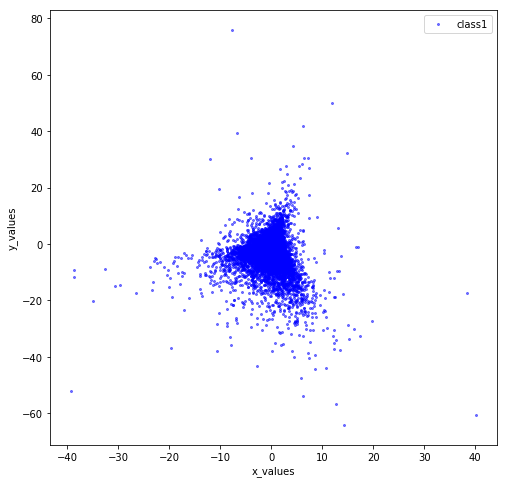

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

# K-means

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.649273    -1.62679401]
 [  0.0822345    0.48573376]
 [ -0.23929451  -7.1120987 ]
 [  2.85747587 -19.75220714]]


In [31]:
#Print first 200 predictions
print (c_preds[0:200])

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1]


Let's see how our cluster looks like

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


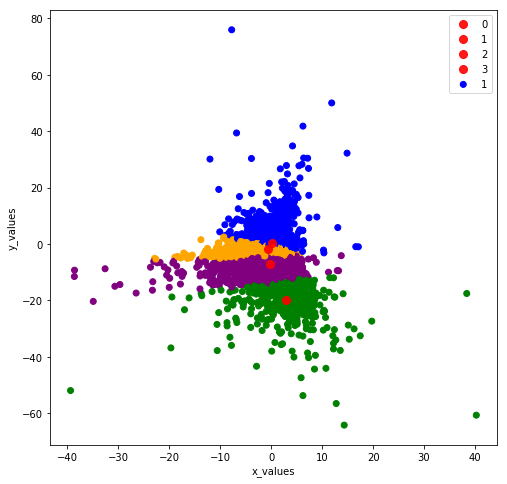

In [32]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

## So now that we have a possible clustering for our customers, let's see if there are any more interesting patterns beneath.

In [33]:
#Appending the cluster prediction column to the dataframe
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

product_description,0TH PULSE CHANA RED LOOSE,AASHIRVAAD SALT PP 1Kg,AASHIRVAAD WHOLE WHEAT ATTA PP 10Kg,AASHIRVAAD WHOLE WHEAT ATTA PP 5Kg,ACT II H&E IPC CHILLI SURPRISE 30g,ACT II H&E IPC CLASSIC SALTED 35g,ACT II H&E IPC GOLDEN SIZZLE 30g,AFL-SOCKS-PO5-149,AGRIPURE ATTA SAMPOORNA 10kg,ALA LIQUID BLEACH FABRIC WHITENER 500M,...,WATANA GREEN LOOSE,WATERMELON KIRAN,WHEAT LOKWAN B LOOSE,WHEEL DET POW LEMON JASMINE 1Kg,WHEEL DETERGENT BAR ACTIVE 240g,WHISPER SANITRY PAD ULTRA WGS XL 30P,WHISPER SANITRYPAD CHOICE WING 8P,WHISPER SANTRYPAD CHOICE ULTRA 6P,sBB-CB-13X16X168SWG-Suitable for ROI New,cluster
customerID,,,,,,,,,,,,,,,,,,,,,
BBID_2041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_20410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_204100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
BBID_2041000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_204100000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_204100001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_204100002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_204100003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BBID_204100004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


(147960, 501)


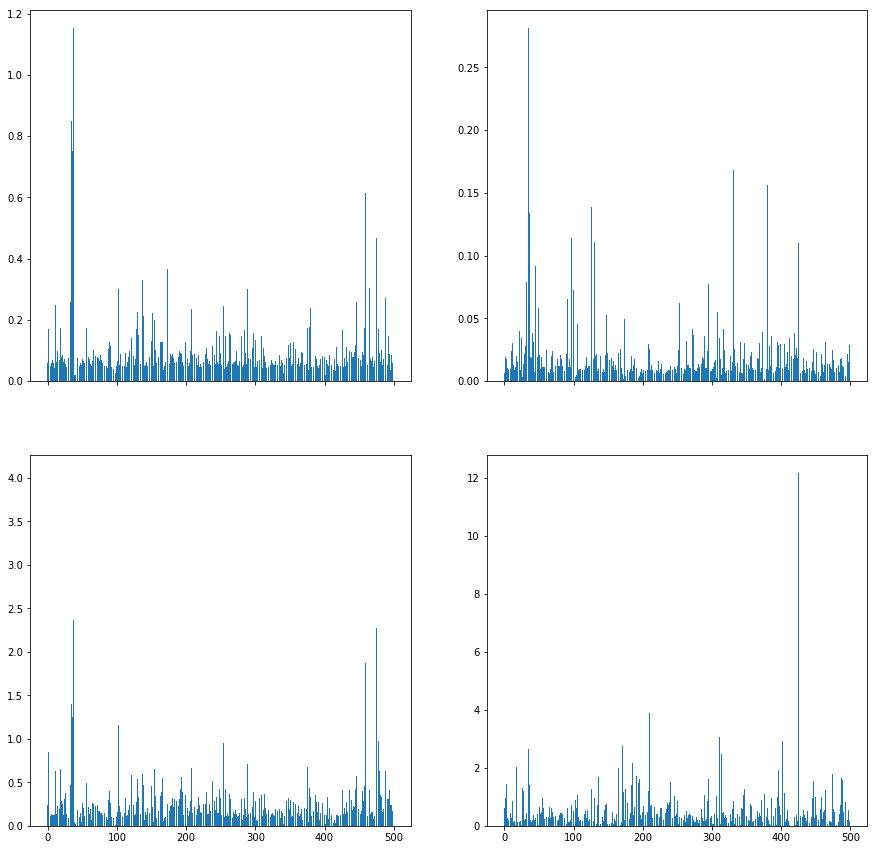

In [34]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

#Find the mean for each cluster and plot it against the top 500 products
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

Let's check out what are the top 10 goods bought by people of each cluster.

In [35]:
#Cluster c0
c0.sort_values(ascending=False)[0:10]

product_description
BB-CB-27X30X208SWG NEW                     1.152725
SUGAR MEDIUM LOOSE                         1.029619
BB-CB-20X25X208SWG NEW                     0.929076
BB-CB-20X25X168SWG-Suitable for ROI New    0.850515
BB-CB-27X30X168SWG-Suitable for ROI New    0.752054
TATA SALT PP 1Kg                           0.614775
TUR DAL PREM LOOSE                         0.467488
MAGGI NDL MASALA 420g                      0.443133
Fiber bag 45 GSM 20x25                     0.364457
DNU                                        0.330614
dtype: float64

In [36]:
#Cluster c1
c1.sort_values(ascending=False)[0:10]

product_description
BB-CB-20X25X208SWG NEW                     0.281376
BB-CB-27X30X208SWG NEW                     0.246597
TOMATO LOOSE                               0.223768
Fiber bag 45 GSM 20x25                     0.189154
ONION LOOSE                                0.168129
BB-CB-20X25X168SWG-Suitable for ROI New    0.167586
PB Card FVRL                               0.157376
POTATO LOOSE                               0.156518
CORIANDER                                  0.138597
CUCUMBER GREEN LOOSE                       0.135501
dtype: float64

In [37]:
#Cluster c2
c2.sort_values(ascending=False)[0:10]

product_description
SUGAR MEDIUM LOOSE                         4.056254
BB-CB-27X30X208SWG NEW                     2.361094
TUR DAL PREM LOOSE                         2.268070
TATA SALT PP 1Kg                           1.865179
BB-CB-20X25X208SWG NEW                     1.633564
BB-CB-20X25X168SWG-Suitable for ROI New    1.395035
GH DAILY WHO SPICE JEERA100g               1.257071
BB-CB-27X30X168SWG-Suitable for ROI New    1.249843
MOONG DAL PREM LOOSE                       1.162791
CHANA DAL PREM LOOSE                       1.156820
dtype: float64

In [38]:
#Cluster c3
c3.sort_values(ascending=False)[0:10]

product_description
SUGAR MEDIUM LOOSE                12.178832
TUR DAL PREM LOOSE                 7.065693
TATA SALT PP 1Kg                   4.357664
BB-CB-27X30X208SWG NEW             4.107664
GH DAILY WHO SPICE JEERA100g       3.881387
CHANA DAL PREM LOOSE               3.297445
URAD DAL PREM LOOSE                3.291971
MOONG DAL PREM LOOSE               3.052920
RUCHI GOLD PALMOLEIN OIL PP 1L     2.912409
FUTANA FRIED LOOSE                 2.762774
dtype: float64

The interesting thing here is even though the 4 products: BB-CB-27X30X208SWG NEW, BB-CB-20X25X208SWG NEW, SUGAR MEDIUM LOOSE, BB-CB-20X25X168SWG-Suitable for ROI New confirm our hypothesis which we made previously about the top 5 products, TOMATO LOOSE does not fall under this category and is only present in one of the clusters.

What we can inspect here is if clusters differ in quantities and proportions, with respect of these goods, or if a cluster is characterized by some goods not included in this list. 

In [39]:
from IPython.display import display, HTML
cluster_means = [[c0['BB-CB-27X30X208SWG NEW'],c0['BB-CB-20X25X208SWG NEW'],c0['SUGAR MEDIUM LOOSE'], c0['BB-CB-20X25X168SWG-Suitable for ROI New'], c0['TOMATO LOOSE']],
                 [c1['BB-CB-27X30X208SWG NEW'],c1['BB-CB-20X25X208SWG NEW'],c1['SUGAR MEDIUM LOOSE'], c1['BB-CB-20X25X168SWG-Suitable for ROI New'], c1['TOMATO LOOSE']],
                 [c2['BB-CB-27X30X208SWG NEW'],c2['BB-CB-20X25X208SWG NEW'],c2['SUGAR MEDIUM LOOSE'], c2['BB-CB-20X25X168SWG-Suitable for ROI New'], c2['TOMATO LOOSE']],
                 [c3['BB-CB-27X30X208SWG NEW'],c3['BB-CB-20X25X208SWG NEW'],c3['SUGAR MEDIUM LOOSE'], c3['BB-CB-20X25X168SWG-Suitable for ROI New'], c3['TOMATO LOOSE']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['BB-CB-27X30X208SWG NEW','BB-CB-20X25X208SWG NEW','SUGAR MEDIUM LOOSE','BB-CB-20X25X168SWG-Suitable for ROI New','TOMATO LOOSE'])
HTML(cluster_means.to_html())

,BB-CB-27X30X208SWG NEW,BB-CB-20X25X208SWG NEW,SUGAR MEDIUM LOOSE,BB-CB-20X25X168SWG-Suitable for ROI New,TOMATO LOOSE
0,1.152725,0.929076,1.029619,0.850515,0.304466
1,0.246597,0.281376,0.109962,0.167586,0.223768
2,2.361094,1.633564,4.056254,1.395035,0.411691
3,4.107664,2.664234,12.178832,1.979927,0.598540


The following table depicts the percentage these goods with respect to the other top 5 in each cluster.

It seems people of cluster 3 buy much more sugar than people from other clusters.

Another interesting observation is that people in cluster 2 and 3 buy a huge lot of TUR DAL even though it is not even there in the top 10 products. So this is where the unique properties of the clusters really shows up and this can be really used to a great use in later product recommendations.